# Option Strategies

References :  
* Option, Futures & Other Derivatives - John Hull - $10^{th}$ Edition - Chapters 10 - 11 - 12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

We first define option classes to input a correct price for call and put options that respect the absence of arbitrage opportunity principle.
In this project, we only consider european options

In [2]:
class Call:
    #call = Call(C,S0,K,T,r)
    #call = Call(Put(C,S0,K,T,r))
    def __init__(self,*args): #C,S0,K,T,r
        if(len(args) != 1):
            if args[0] > args[1]: # C > S0
                print("The call option can never be worth more than the current price of the underlying asset ! Please input new parameters.")
                self.C = 0
                self.S0 = 0
                self.K = 0
                self.T = 0
                self.r = 0 
            elif args[0] < max(args[1] - args[2]*np.exp(-args[3]*args[4]),0): # C < max(S0 - K*np.exp(-r*T),0):
                print("The call option price can never be negative ! Please input new parameters.")
                self.C = 0
                self.S0 = 0
                self.K = 0
                self.T = 0
                self.r = 0
            else:
                self.C = args[0]
                self.S0 = args[1]
                self.K = args[2]
                self.T = args[3]
                self.r = args[4]
                
        else: #Call-Put parity formula
            self.C = args[0].P + args[0].S0 - args[0].K * np.exp(-args[0].r * args[0].T)
            self.S0 = args[0].S0
            self.K = args[0].K
            self.T = args[0].T
            self.r = args[0].r
            
    def payoff(self,S_t):
        if S_t < self.K: #Price of the underlying below the strike price
            return -self.C
        else: 
            return S_t - self.K - self.C
        
    def properties(self):
        print("\n---Call properties---\n")
        print(f"C = {self.C}")
        print(f"S0 = {self.S0}")
        print(f"K = {self.K}")
        print(f"T = {self.T}")
        print(f"r = {self.r}\n")

In [3]:
class Put:
    #put = Put(C,S0,K,T,r)
    #put = Put(Call(C,S0,K,T,r))
    def __init__(self,*args): #C,S0,K,T,r
        if(len(args) != 1):
            if args[0] > args[2]*np.exp(-args[4]*args[3]):
                print("The put option price can never be worth more than the strike price of the underlying asset ! Please input new parameters.")
                self.P = 0
                self.S0 = 0
                self.K = 0
                self.T = 0
                self.r = 0
            elif args[0] < np.max(args[3] * np.exp(-args[4]*args[3]) - args[2],0):
                print("The put option price can never be negative ! Please input new parameters.")
                self.P = 0
                self.S0 = 0
                self.K = 0
                self.T = 0
                self.r = 0
            else:
                self.P = args[0]
                self.S0 = args[1]
                self.K = args[2]
                self.T = args[3]
                self.r = args[4]
                
        else: #Call-Put parity formula
            self.P =  args[0].C + args[0].K * np.exp(-args[0].r * args[0].T) - args[0].S0
            self.S0 = args[0].S0
            self.K = args[0].K
            self.T = args[0].T
            self.r = args[0].r
    
    def payoff(self,S_t):
        if S_t < self.K: #Price of the underlying below the strike price
            return self.K - S_t - self.P
        else:
            return -self.P
    
    
    def properties(self):
        print("\n---Put properties---\n")
        print(f"P = {self.P}")
        print(f"S0 = {self.S0}")
        print(f"K = {self.K}")
        print(f"T = {self.T}")
        print(f"r = {self.r}\n")

# Options payoffs

In [4]:
#Initialization of the variables
S0 = 50 #Price of the underlying asset
K = 55 #Strike Price
T = 1 #Maturity 1 year
r = 0.05 #Risk free rate
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [5]:
C1 = Call(4.0,S0,K,T,r) #Price of the call option
P1 = Put(2.0,S0,K,T,r) #Price of the put option

In [6]:
S_payoff = [S0 - S_t for S_t in St] #Short position on the stock 
C_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
P_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put

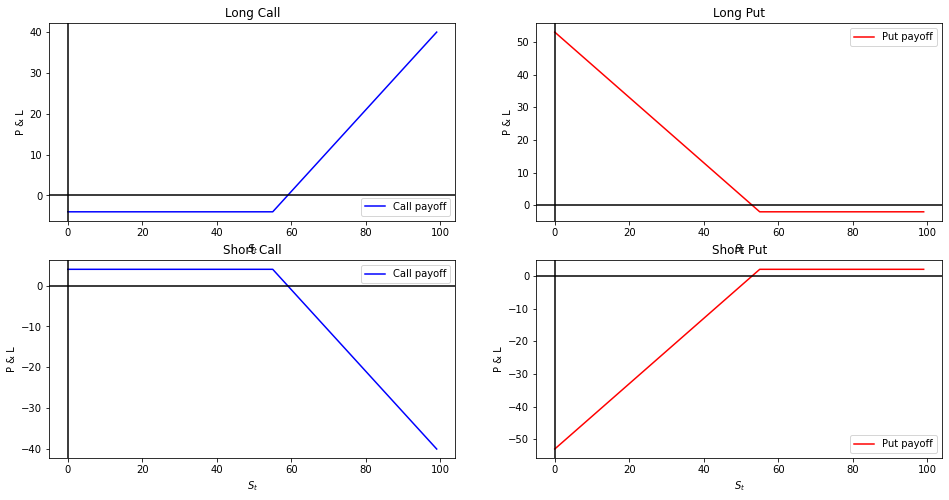

In [7]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

#Long call
ax[0,0].plot(St,C_payoff,'b',label="Call payoff")

ax[0,0].set_xlabel('$S_t$')
ax[0,0].set_ylabel('P & L')
ax[0,0].set_title('Long Call')

ax[0,0].legend()
ax[0,0].axhline(y=0, color='k')
ax[0,0].axvline(x=0, color='k')

#Short call
ax[1,0].plot(St,[-x for x in C_payoff],'b',label="Call payoff")

ax[1,0].set_xlabel('$S_t$')
ax[1,0].set_ylabel('P & L')
ax[1,0].set_title('Short Call')

ax[1,0].legend()
ax[1,0].axhline(y=0, color='k')
ax[1,0].axvline(x=0, color='k')

#Long put
ax[0,1].plot(St,P_payoff,'r',label="Put payoff")

ax[0,1].set_xlabel('$S_t$')
ax[0,1].set_ylabel('P & L')
ax[0,1].set_title('Long Put')

ax[0,1].legend()
ax[0,1].axhline(y=0, color='k')
ax[0,1].axvline(x=0, color='k')

#Short put

ax[1,1].plot(St,[-x for x in P_payoff],'r',label="Put payoff")

ax[1,1].set_xlabel('$S_t$')
ax[1,1].set_ylabel('P & L')
ax[1,1].set_title('Short Put')

ax[1,1].legend()
ax[1,1].axhline(y=0, color='k')
ax[1,1].axvline(x=0, color='k')

## Strategies with an option and an underlying asset

###### 1 - Long Call Option and Short Stock 

In [8]:
#Initialization of the variables
S0 = 51 #Price of the underlying asset
K = 50 #Strike Price
T = 0.5 #Maturity eg : 0.5 => 6 months
r = 0.12 #Risk free rate
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [9]:
C1 = Call(4.0,S0,K,T,r) #Price of the call option

S_payoff = [S0 - S_t for S_t in St] #Short position on the stock 
C_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
strategy_payoff = [S_payoff[t] + C_payoff[t] for t in range(len(St))]

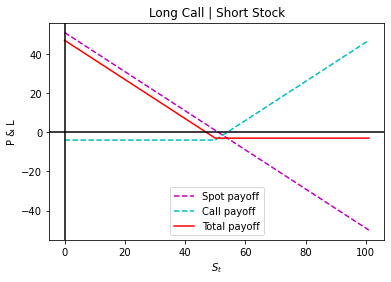

In [10]:
fig, ax = plt.subplots()
ax.plot(St,S_payoff,'m--',label="Spot payoff")
ax.plot(St,C_payoff,'c--',label="Call payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Call | Short Stock')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

This strategy is called the covered call and is particularly useful when the price of the underlying asset brutally increases.

###### 2 - Long Put Option and Long Stock 

In [41]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K = 40 #Strike Price
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [44]:
P1 = Put(4.0,S0,K,T,r) #Price of the put option

S_payoff = [S_t - S0 for S_t in St] #Long position on the stock 
P_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put
strategy_payoff = [S_payoff[t] + P_payoff[t] for t in range(len(St))]

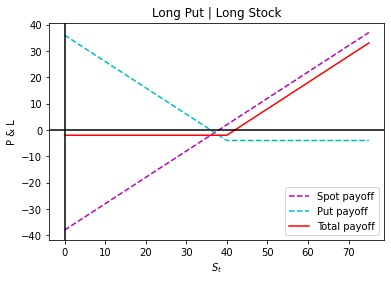

In [45]:
fig, ax = plt.subplots()
ax.plot(St,S_payoff,'m--',label="Spot payoff")
ax.plot(St,P_payoff,'c--',label="Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Put | Long Stock')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

We simultaneously buy a put and a stock. This strategy is called the protective put.

###### 3 - Short Call Option and Long Stock

In [46]:
#Initialization of the variables
S0 = 51 #Price of the underlying asset
K = 50 #Strike Price
T = 0.5 #Maturity eg : 0.5 => 6 months
r = 0.12 #Risk free rate
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [47]:
C2 = Call(4.0,S0,K,T,r) #Price of the call option

S_payoff = [S_t - S0 for S_t in St] #Short position on the stock 
C_payoff = [-C2.payoff(S_t) for S_t in St] #Long position on the call
strategy_payoff = [S_payoff[t] + C_payoff[t] for t in range(len(St))]

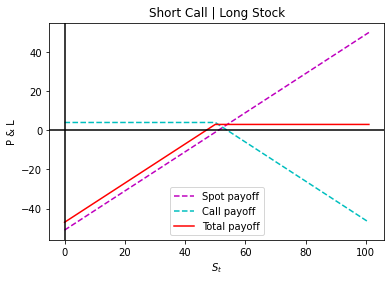

In [48]:
fig, ax = plt.subplots()
ax.plot(St,S_payoff,'m--',label="Spot payoff")
ax.plot(St,C_payoff,'c--',label="Call payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Short Call | Long Stock')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

###### 4 - Short Put Option and Short Stock

In [49]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K = 40 #Strike Price
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [52]:
P2 = Put(4.0,S0,K,T,r) #Price of the put option

S_payoff = [S0 - S_t for S_t in St] #Short position on the stock 
P_payoff = [-P2.payoff(S_t) for S_t in St] #Short position on the put
strategy_payoff = [S_payoff[t] + P_payoff[t] for t in range(len(St))]

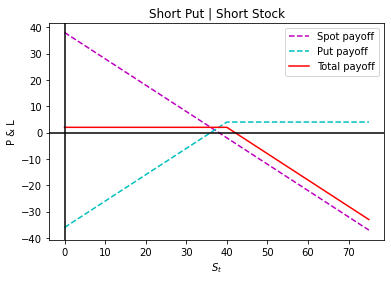

In [53]:
fig, ax = plt.subplots()
ax.plot(St,S_payoff,'m--',label="Spot payoff")
ax.plot(St,P_payoff,'c--',label="Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Short Put | Short Stock')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

## Spreads 

###### 1 - Bull spread 

The bull spread is composed of a long position on a call option with a pre-determined strike price $K$ and a short position of a call option with $K2$ > $K1$

In [54]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K1 = 36 #Strike Price for the call
K2 = 40 #Strike Price for the put
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [55]:
C3 = Call(4.0,S0,K1,T,r) #Price of the call option
C4 = Call(3,S0,K2,T,r) #Price of the call option

C3_payoff = [C3.payoff(S_t) for S_t in St] #Long position on the call
C4_payoff = [-C4.payoff(S_t) for S_t in St] #Short position on the call
strategy_payoff = [C3_payoff[t] + C4_payoff[t] for t in range(len(St))]

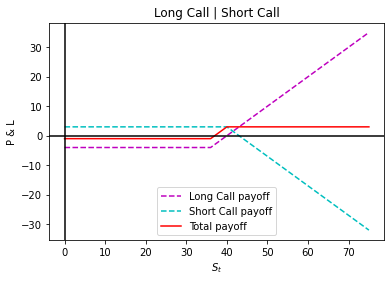

In [56]:
fig, ax = plt.subplots()
ax.plot(St,C3_payoff,'m--',label="Long Call payoff")
ax.plot(St,C4_payoff,'c--',label="Short Call payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Call | Short Call')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

###### 2 - Bear spreads 

The bear spread is composed of a long position on a put option with a pre-determined strike price $K$ and a short position of a putl option with $K2$ $\neq$ $K1$.
Compared to the bull spread, the price of the long position is superior to the price of the short position.

In [57]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K1 = 42 #Strike Price
K2 = 40
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [58]:
P3 = Put(4,S0,K1,T,r) #Price of the put option
P4 = Put(3,S0,K2,T,r) #Price of the put option

P3_payoff = [P3.payoff(S_t) for S_t in St] #Long position on the put
P4_payoff = [-P4.payoff(S_t) for S_t in St] #Short position on the put
strategy_payoff = [P3_payoff[t] + P4_payoff[t] for t in range(len(St))]

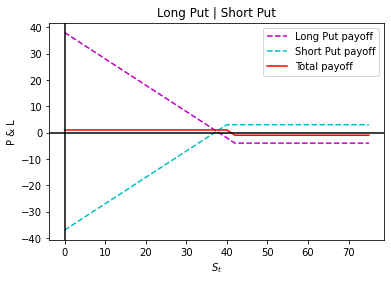

In [59]:
fig, ax = plt.subplots()
ax.plot(St,P3_payoff,'m--',label="Long Put payoff")
ax.plot(St,P4_payoff,'c--',label="Short Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Put | Short Put')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

The bear spread is used when the trader thinks that the underlying's asset rate will go down.

###### 3 - Butterfly spreads 

A butterfly spread is composed of positions on options with three different strike prices. For instance, we can long a call at $K1$, long another call at $K3$ and short two calls at $K2$ such that $K1$ < $K2$ < $K3$

In [60]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K1 = 42 #Strike Price for the first call
K3 = 46 #Strike Price for the second call
K2 = 44 #Strike Price for the third and fourth call
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [61]:
C1 = Call(4.0,S0,K1,T,r)
C2 = Call(2.0,S0,K3,T,r)
C3 = Call(2.5,S0,K2,T,r)
C4 = Call(2.5,S0,K2,T,r)

C1_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
C2_payoff = [C2.payoff(S_t) for S_t in St] #Long position on the call
C3_payoff = [-C3.payoff(S_t) for S_t in St] #Short position on the call
C4_payoff = [-C4.payoff(S_t) for S_t in St] #Short position on the call
strategy_payoff = [C1_payoff[t] + C2_payoff[t] + C3_payoff[t] + C4_payoff[t] for t in range(len(St))]

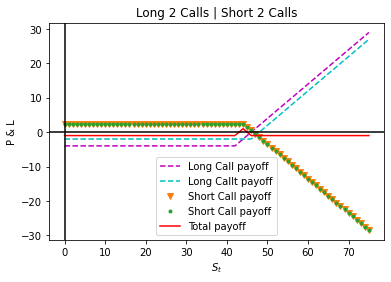

In [62]:
fig, ax = plt.subplots()
ax.plot(St,C1_payoff,'m--',label="Long Call payoff")
ax.plot(St,C2_payoff,'c--',label="Long Call payoff")
ax.plot(St,C3_payoff,'C1v',label="Short Call payoff")
ax.plot(St,C4_payoff,'C2.',label="Short Call payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long 2 Calls | Short 2 Calls')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

The butterfly spread requires a low initial investment.

## Combinations

###### 1 - Straddles 

The straddle strategy is composed of a long position on a call and a put of same strike price and same maturity.

In [63]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K = 42 #Strike Price for the call
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [64]:
C1 = Call(3.0,S0,K,T,r)
P1 = Put(C1)

C1_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
P1_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put
strategy_payoff = [C1_payoff[t] + P1_payoff[t] for t in range(len(St))]

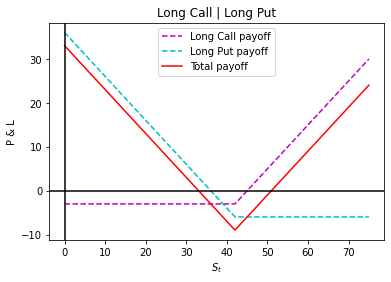

In [65]:
fig, ax = plt.subplots()
ax.plot(St,C1_payoff,'m--',label="Long Call payoff")
ax.plot(St,P1_payoff,'c--',label="Long Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Call | Long Put')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Straddles are useful when the trader predicts a strong variation in the asset's price but does not know its direction.

###### 2 - Strips 

A strip is composed of a long position on a call and two puts with same strike prices and same maturities.

In [66]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K = 42 #Strike Price for the call
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [67]:
C1 = Call(3.0,S0,K,T,r)
P1 = Put(C1)
P2 = Put(C1)

C1_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
P1_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put
P2_payoff = [P2.payoff(S_t) for S_t in St] #Long position on the put
strategy_payoff = [C1_payoff[t] + P1_payoff[t] + P2_payoff[t] for t in range(len(St))]

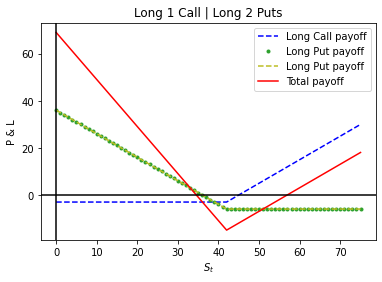

In [68]:
fig, ax = plt.subplots()
ax.plot(St,C1_payoff,'b--',label="Long Call payoff")
ax.plot(St,P1_payoff,'C2.',label="Long Put payoff")
ax.plot(St,P1_payoff,'C8--',label="Long Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long 1 Call | Long 2 Puts')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In this strategy, the trader bets on a high variation of the asset's price but thinks that there is a higher probability for the price to go up than down.

###### 3 - Straps  

A strip is composed of a long position on two calls and a put with same strike prices and same maturities.

In [69]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K = 42 #Strike Price for the call
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [70]:
P1 = Put(4.0,S0,K,T,r)
C1 = Call(P1)
C2 = Call(P1)

C1_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
C2_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
P1_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put
strategy_payoff = [C1_payoff[t] + + C2_payoff[t] + P1_payoff[t] for t in range(len(St))]

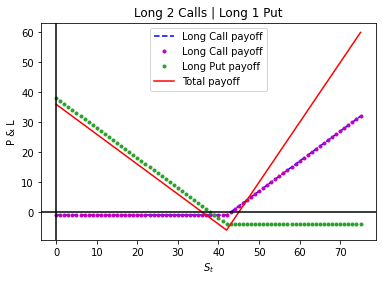

In [71]:
fig, ax = plt.subplots()
ax.plot(St,C1_payoff,'b--',label="Long Call payoff")
ax.plot(St,C2_payoff,'m.',label="Long Call payoff")
ax.plot(St,P1_payoff,'C2.',label="Long Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long 2 Calls | Long 1 Put')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In this strategy, the trader bets on a high variation of the asset's price but thinks that there is a higher probability for the price to go down than up.

###### 4 - Strangles 

A strangle is composed of a long position on a put and a call of same maturities but with different strike prices.

In [72]:
#Initialization of the variables
S0 = 38 #Price of the underlying asset
K1 = 42 #Strike Price for the put
K2 = 46
T = 0.25 #Maturity 0.25 => 3 months
r = 0.10
St = [x for x in range(2*S0)] #Prices of the underlying asset

In [73]:
C1 = Call(3.0,S0,K2,T,r)
P1 = Put(5.0,S0,K1,T,r)

C1_payoff = [C1.payoff(S_t) for S_t in St] #Long position on the call
P1_payoff = [P1.payoff(S_t) for S_t in St] #Long position on the put
strategy_payoff = [C1_payoff[t] + P1_payoff[t] for t in range(len(St))]

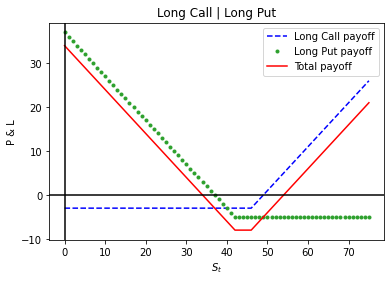

In [74]:
fig, ax = plt.subplots()
ax.plot(St,C1_payoff,'b--',label="Long Call payoff")
ax.plot(St,P1_payoff,'C2.',label="Long Put payoff")
ax.plot(St,strategy_payoff,'r-',label="Total payoff")

ax.set_xlabel('$S_t$')
ax.set_ylabel('P & L')
ax.set_title('Long Call | Long Put')

ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

This strategy is similar to the straddle one. The trader just expects a higher variation of the asset's price.